# Exploratory Data Analysis - SARESP
*Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo (SARESP)*

#### Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image

### Load data

In [2]:
PATH = '../data/raw'

In [3]:
data = pd.read_csv(os.path.join(PATH, 'SARESP_escolas_2018.csv'), sep=';', encoding='latin-1', decimal=',')
print(data.shape)
data.head()

(20382, 12)


,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof
0,1,1,Rede Estadual,1,12,AYRES DE MOURA PROFESSOR,9º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,263.1
1,1,1,Rede Estadual,1,12,AYRES DE MOURA PROFESSOR,9º Ano EF,9,GERAL,2,MATEMÁTICA,272.3
2,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO,3º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,170.4
3,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO,3º Ano EF,9,GERAL,2,MATEMÁTICA,181.5
4,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO,5º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,207.9


## Estatísticas básicas

In [4]:
data.describe()

,DEPADM,DepBol,codRMet,CODESC,cod_per,co_comp,medprof
count,20382.0,20382.0,20382.000000,20382.000000,20382.0,20382.000000,20378.000000
mean,1.0,1.0,2.995879,288287.812678,9.0,1.500000,251.166876
std,0.0,0.0,2.018117,396040.329375,0.0,0.500012,32.044926
min,1.0,1.0,1.000000,12.000000,9.0,1.000000,140.600000
25%,1.0,1.0,1.000000,16592.500000,9.0,1.000000,231.900000
50%,1.0,1.0,3.000000,37060.000000,9.0,1.500000,254.950000
75%,1.0,1.0,5.000000,902080.750000,9.0,2.000000,274.400000
max,1.0,1.0,7.000000,926103.000000,9.0,2.000000,362.200000


In [5]:
data.select_dtypes('object').describe()

,NomeDepBol,NOMESC,SERIE_ANO,periodo,ds_comp
count,20382,20382,20382,20382,20382
unique,1,5024,4,1,2
top,Rede Estadual,TANCREDO NEVES PRESIDENTE,EM-3ª série,GERAL,MATEMÁTICA
freq,20382,16,7338,20382,10191


## Missing values

In [6]:
data.isnull().sum()

DEPADM        0
DepBol        0
NomeDepBol    0
codRMet       0
CODESC        0
NOMESC        0
SERIE_ANO     0
cod_per       0
periodo       0
co_comp       0
ds_comp       0
medprof       4
dtype: int64

#### Filtering data with missing values

In [7]:
data[data['medprof'].isnull()]

,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof
14078,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,9º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,NaN
14079,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,9º Ano EF,9,GERAL,2,MATEMÁTICA,NaN
14080,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,EM-3ª série,9,GERAL,1,LÍNGUA PORTUGUESA,NaN
14081,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,EM-3ª série,9,GERAL,2,MATEMÁTICA,NaN


#### Filtrando dados da escola *SONIA MARIA ALEXANDRE PEREIRA PROFESSORA*
A base de dados apresenta apenas 4 instâncias com lacunas, e todas são do atributo (medprof), o indicador de proeficiência que é o mais importante da base. 

In [8]:
data[data['CODESC'] == 351064]

,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof
14078,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,9º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,NaN
14079,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,9º Ano EF,9,GERAL,2,MATEMÁTICA,NaN
14080,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,EM-3ª série,9,GERAL,1,LÍNGUA PORTUGUESA,NaN
14081,1,1,Rede Estadual,4,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,EM-3ª série,9,GERAL,2,MATEMÁTICA,NaN


Todos as instâncias referêntes a esta escola não tem valor para o atributo *medprof*. Por isso, estes serão removidos da base.

In [9]:
data.dropna(inplace=True)

## Análise da Média da Proficiência (*medprof*)

#### Todos os dados

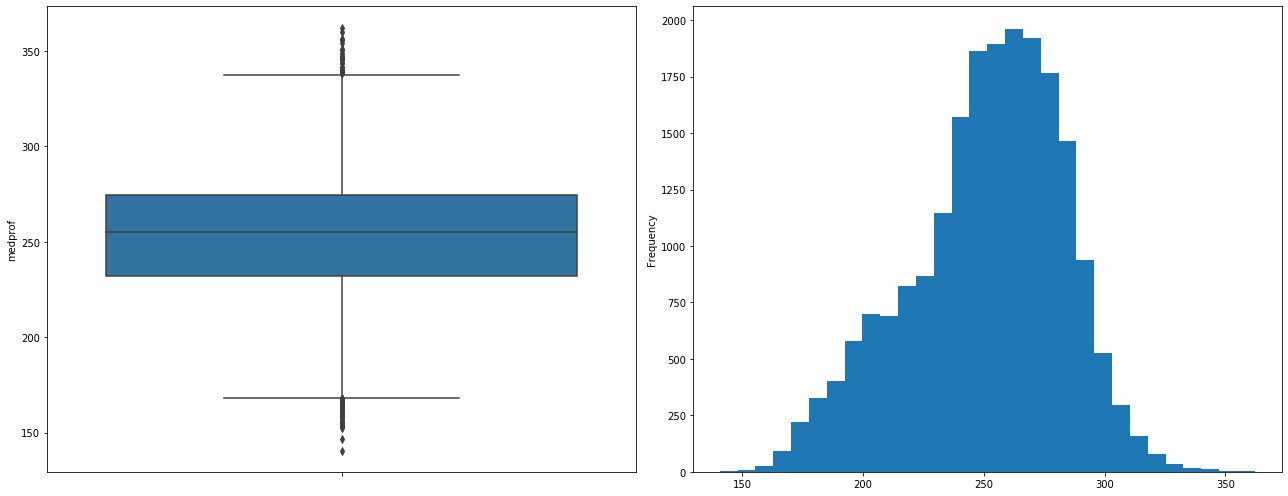

In [10]:
fig, axs = plt.subplots(1,2, figsize=(18,7))
sns.boxplot(data['medprof'], orient='vertical', ax=axs[0])
# sns.boxplot(data['medprof'], orient='vertical', ax=axs[1])
data['medprof'].plot(kind='hist', bins=30, ax=axs[1])
plt.tight_layout()

In [11]:
data[data['CODESC'] == data['CODESC'].value_counts().index[0]]

,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof
11348,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,3º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,182.2
11349,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,3º Ano EF,9,GERAL,2,MATEMÁTICA,234.7
11350,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,5º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,198.3
11351,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,5º Ano EF,9,GERAL,2,MATEMÁTICA,207.7
11352,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,9º Ano EF,9,GERAL,1,LÍNGUA PORTUGUESA,240.4
11353,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,9º Ano EF,9,GERAL,2,MATEMÁTICA,247.1
11354,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,EM-3ª série,9,GERAL,1,LÍNGUA PORTUGUESA,275.1
11355,1,1,Rede Estadual,1,40964,LEONOR RENDESI PROFESSORA,EM-3ª série,9,GERAL,2,MATEMÁTICA,271.1


#### Intervalos de Pontuação
Baseado em: https://dados.educacao.sp.gov.br/story/saresp

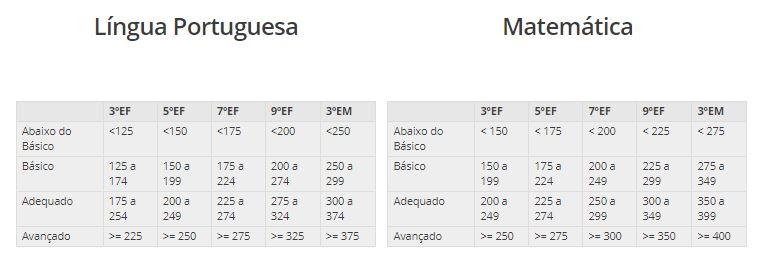

In [12]:
Image('../references/intervalos_pontuacao.PNG')

In [13]:
bins_port_3EF = [0, 125, 175, 255, np.inf]
bins_port_5EF = [0, 150, 200, 250, np.inf]
bins_port_7EF = [0, 175, 225, 275, np.inf]
bins_port_9EF = [0, 200, 275, 325, np.inf]
bins_port_3EM = [0, 250, 300, 375, np.inf]

bins_mat_3EF = [0, 150, 200, 250, np.inf]
bins_mat_5EF = [0, 175, 225, 275, np.inf]
bins_mat_7EF = [0, 200, 250, 300, np.inf]
bins_mat_9EF = [0, 225, 300, 350, np.inf]
bins_mat_3EM = [0, 275, 350, 400, np.inf]

In [14]:
map_intervals = {
    'LÍNGUA PORTUGUESA': {
        '3º Ano EF': bins_port_3EF,
        '5º Ano EF': bins_port_5EF,
        '7º Ano EF': bins_port_7EF,
        '9º Ano EF': bins_port_9EF,
        'EM-3ª série': bins_port_3EM
    },
    'MATEMÁTICA': {
        '3º Ano EF': bins_mat_3EF,
        '5º Ano EF': bins_mat_5EF,
        '7º Ano EF': bins_mat_7EF,
        '9º Ano EF': bins_mat_9EF,
        'EM-3ª série': bins_mat_3EM
    }
}

In [15]:
def check_intervals(disciplina, serie):
    bins = map_intervals[disciplina][serie]
    df = data[(data['ds_comp'] == disciplina) & (data['SERIE_ANO'] == serie)]
    level = pd.cut(x=df['medprof'], bins=bins, labels=['ABAIXO_BASICO', 'BASICO', 'ADEQUADO', 'AVANCADO'], right=False)
    return level

In [16]:
data['PONTUACAO'] = None

disciplinas = data['ds_comp'].unique()
series = data['SERIE_ANO'].unique()

for disciplina in disciplinas:
    for serie in series:
        level = check_intervals(disciplina, serie)
        data.loc[level.index, 'PONTUACAO'] = level

#### Total

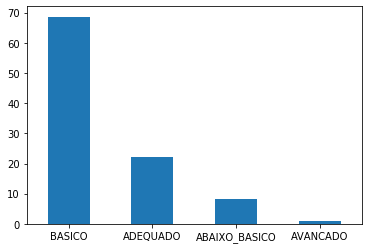

In [17]:
(data['PONTUACAO'].value_counts(normalize=True) * 100).plot(kind='bar', rot=0)

In [18]:
cols_sorted = ['ABAIXO_BASICO', 'BASICO', 'ADEQUADO', 'AVANCADO']

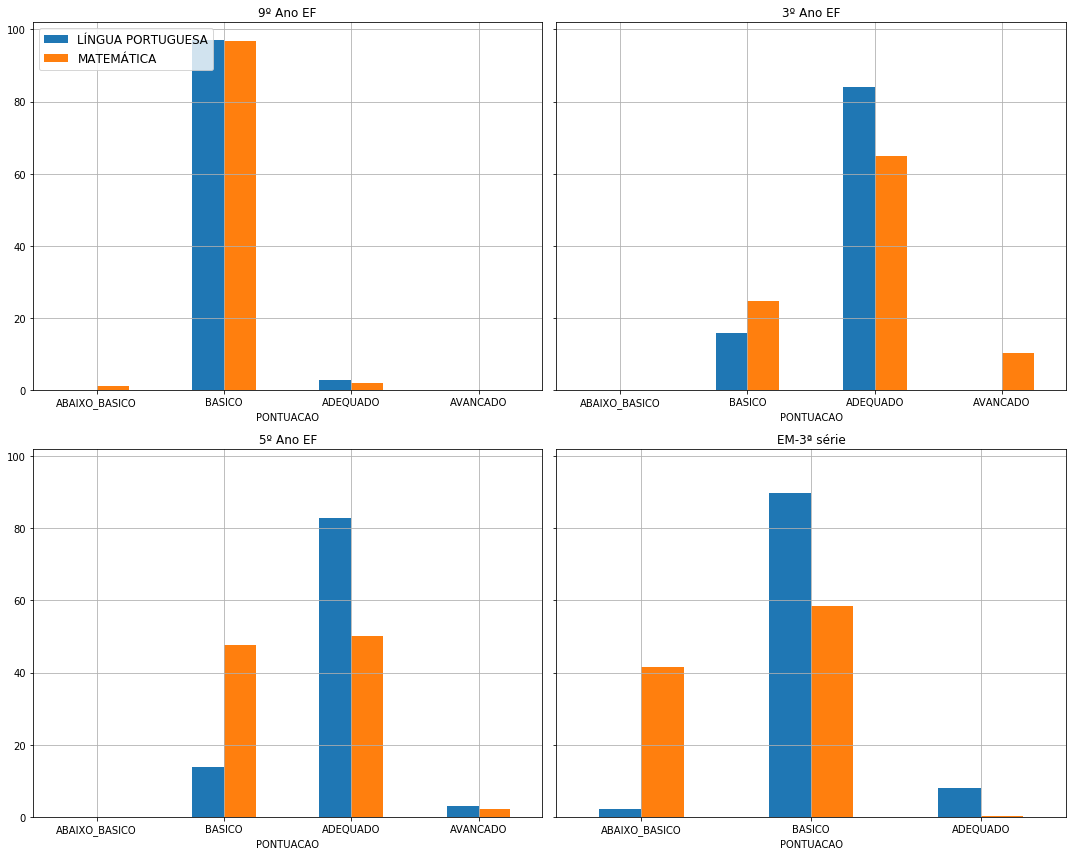

In [19]:
df_pontuacao_disciplinas_serie = data.groupby(['SERIE_ANO', 'ds_comp'])['PONTUACAO'].value_counts(normalize=True).unstack('ds_comp')
df_pontuacao_disciplinas_serie = df_pontuacao_disciplinas_serie.fillna(0) * 100

fig, axs = plt.subplots(2, 2, figsize=(15,12), sharey=True)

k = 0
for i in range(2):
    for j in range(2):
        df = df_pontuacao_disciplinas_serie.loc[series[k], :]
        cols_used_sorted = [c for c in cols_sorted if c in df.index.to_list()]
        df.loc[cols_used_sorted].plot(kind='bar', ax=axs[i][j], rot=0, legend=None, grid=True, title=series[k])
        k += 1
        
axs[0][0].legend(loc='upper left', fontsize=12)

plt.tight_layout()

#### Avaliando escolas boas e ruins baseado na pontuação
Onde:
    - RUIM: {ABAIXO_BASICO, BASICO} 
    - BOM: {ADEQUADO, AVANCADO}

In [20]:
data['DESEMPENHO'] = data['PONTUACAO'].replace({'ABAIXO_BASICO': 'RUIM', 'BASICO': 'RUIM', 'ADEQUADO': 'BOM', 'AVANCADO': 'BOM'})

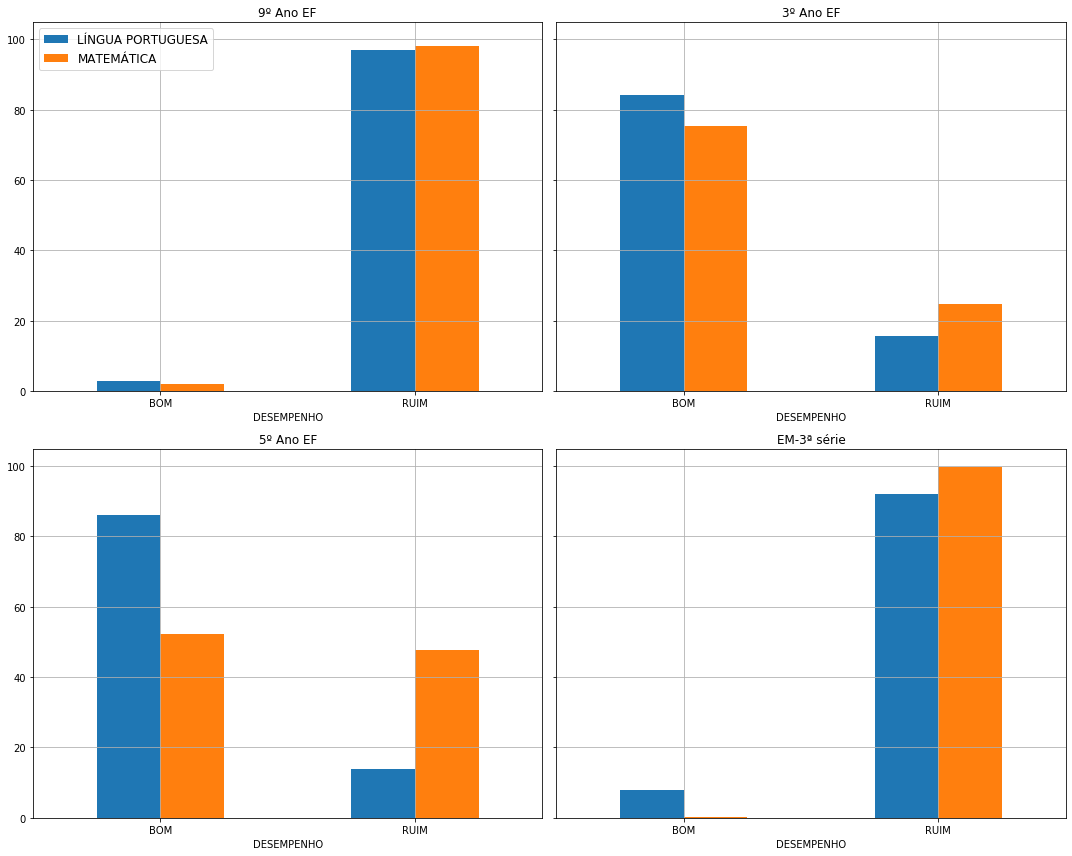

In [21]:
df_desempenho_disciplinas_serie = data.groupby(['SERIE_ANO', 'ds_comp'])['DESEMPENHO'].value_counts(normalize=True).unstack('ds_comp')
df_desempenho_disciplinas_serie = df_desempenho_disciplinas_serie.fillna(0) * 100

fig, axs = plt.subplots(2, 2, figsize=(15,12), sharey=True)

k = 0
for i in range(2):
    for j in range(2):
        df_desempenho_disciplinas_serie.loc[series[k], :].plot(kind='bar', ax=axs[i][j], rot=0, legend=None, grid=True, title=series[k])
        k += 1

axs[0][0].legend(loc='upper left', fontsize=12)

plt.tight_layout()

### Calculando o desempenho por escola

In [22]:
df_desempenho_escola = data.groupby('CODESC')['DESEMPENHO'].value_counts().unstack().fillna(0)
df_desempenho_escola.head()

DESEMPENHO,BOM,RUIM
CODESC,,
12,0.0,2.0
24,1.0,7.0
36,0.0,4.0
48,0.0,2.0
59,0.0,2.0


In [23]:
df_desempenho_escola['DESEMPENHO_ESC'] = 0
df_desempenho_escola.loc[df_desempenho_escola['BOM'] > df_desempenho_escola['RUIM'],  'DESEMPENHO_ESC'] = 1

### Distribuição do desempenho escolar-

In [24]:
df_desempenho_escola['DESEMPENHO_ESC'].value_counts(normalize=True)

0    0.841273
1    0.158727
Name: DESEMPENHO_ESC, dtype: float64

In [25]:
df_desempenho_escola = df_desempenho_escola.reset_index()

## Exportar dos dados

In [26]:
df_desempenho_escola.to_csv('../data/processed/desempenho_escolas_saresp_2018.csv', index=False)